In [41]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv('data/pima-indians-diabetes.csv')
df.head(10)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
x = df.iloc[:,:8]
y = df.iloc[:,8]

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [47]:
seed = 1
np.random.seed(seed)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:
model1 = Sequential()
model1.add(Dense(8, input_dim = 8, activation = "relu"))
model1.add(Dense(8, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))
model1.compile(loss='binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [50]:
history1 = model1.fit(x_train, y_train, batch_size=8, epochs=150, validation_data=(x_test, y_test))

Epoch 1/150
77/77 [==============================] - 1s 4ms/step - loss: 0.8978 - accuracy: 0.6395 - val_loss: 0.6619 - val_accuracy: 0.6948
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6493 - val_loss: 0.6637 - val_accuracy: 0.6623
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6493 - val_loss: 0.6483 - val_accuracy: 0.6688
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6444 - val_loss: 0.6396 - val_accuracy: 0.6688
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.6639 - val_loss: 0.6289 - val_accuracy: 0.6688
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6509 - val_loss: 0.6357 - val_accuracy: 0.6623
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6542 - val_loss: 0.6262 - val_accuracy: 0.6818
Epoch 8/150
7

In [51]:
import matplotlib.pyplot as plt

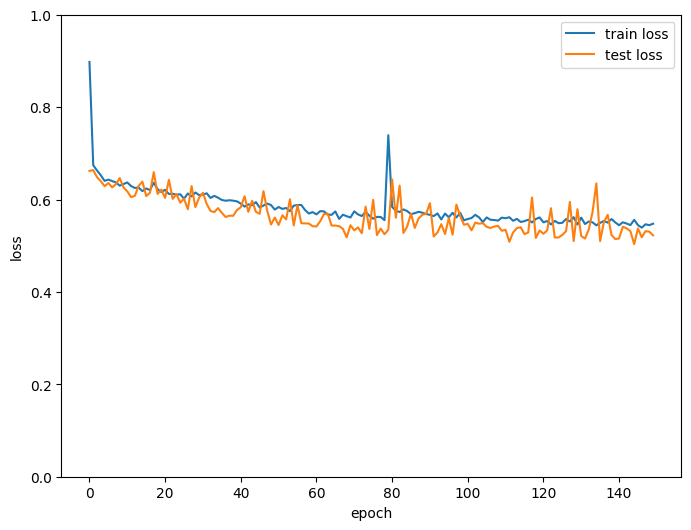

In [52]:
plt.figure(figsize=(8,6))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','test loss'], loc="upper right")
plt.show()

In [53]:
print("Maximum accuracy on test data", max(history1.history['val_accuracy']))

Maximum accuracy on test data 0.7857142686843872


## L2 Regularisation


In [54]:
from tensorflow.keras.regularizers import l2

In [55]:
model2 = Sequential()
model2.add(Dense(8, input_dim = 8, activation = "relu", kernel_regularizer=l2(0.01)))
model2.add(Dense(8, activation = "relu", kernel_regularizer=l2(0.01)))
model2.add(Dense(1, activation = "sigmoid"))
model2.compile(loss='binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [56]:
history2 = model2.fit(x_train, y_train, batch_size=8, epochs=150, validation_data=(x_test, y_test))

Epoch 1/150
77/77 [==============================] - 1s 3ms/step - loss: 1.8899 - accuracy: 0.6313 - val_loss: 0.8338 - val_accuracy: 0.6494
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8261 - accuracy: 0.6509 - val_loss: 0.8187 - val_accuracy: 0.6558
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8133 - accuracy: 0.6525 - val_loss: 0.8069 - val_accuracy: 0.6558
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8030 - accuracy: 0.6525 - val_loss: 0.7975 - val_accuracy: 0.6558
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7948 - accuracy: 0.6525 - val_loss: 0.7897 - val_accuracy: 0.6558
Epoch 6/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7879 - accuracy: 0.6525 - val_loss: 0.7833 - val_accuracy: 0.6558
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7819 - accuracy: 0.6525 - val_loss: 0.7775 - val_accuracy: 0.6558
Epoch 8/150
7

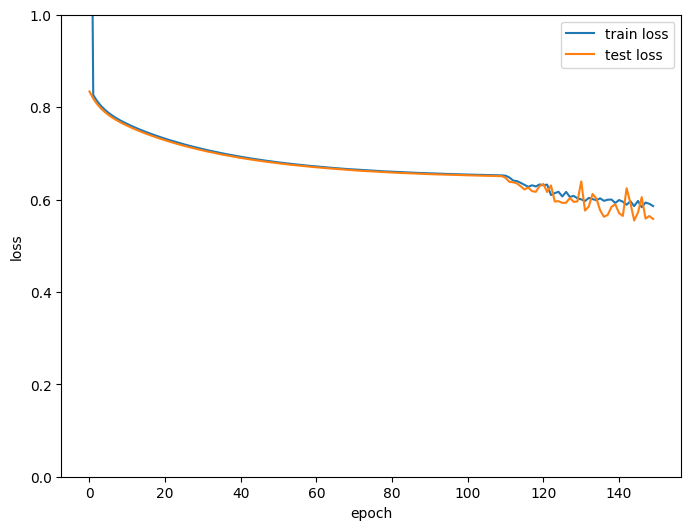

Maximum accuracy on test data 0.798701286315918


In [57]:
plt.figure(figsize=(8,6))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','test loss'], loc="upper right")
plt.show()
print("Maximum accuracy on test data", max(history2.history['val_accuracy']))

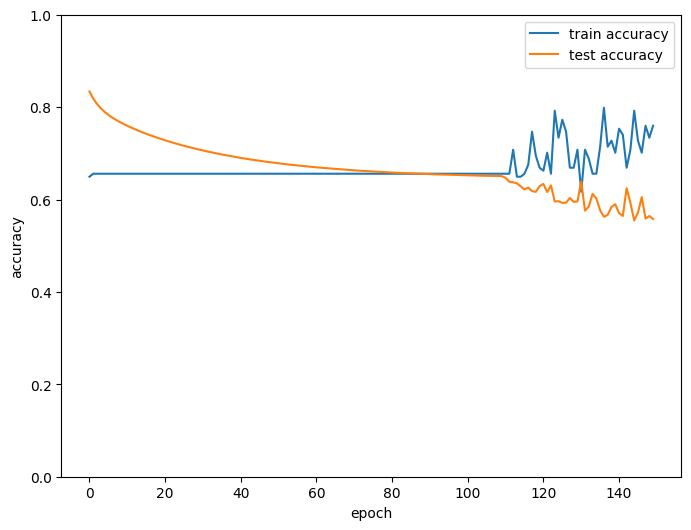

Maximum accuracy on test data 0.798701286315918


In [58]:
plt.figure(figsize=(8,6))
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy','test accuracy'], loc="upper right")
plt.show()
print("Maximum accuracy on test data", max(history2.history['val_accuracy']))

In [59]:
model3 = Sequential()
model3.add(Dense(8, input_dim = 8, activation = "relu", kernel_regularizer=l2(0.5)))
model3.add(Dense(8, activation = "relu", kernel_regularizer=l2(0.5)))
model3.add(Dense(1, activation = "sigmoid"))
model3.compile(loss='binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
history3 = model3.fit(x_train, y_train, batch_size=8, epochs=150, validation_data=(x_test, y_test), verbose=0)

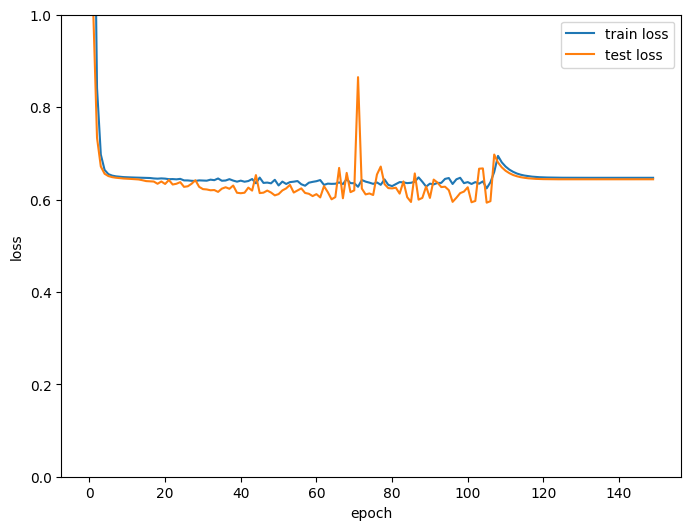

Maximum accuracy on test data 0.798701286315918


In [60]:
plt.figure(figsize=(8,6))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','test loss'], loc="upper right")
plt.show()
print("Maximum accuracy on test data", max(history3.history['val_accuracy']))